In [ ]:
import gymnasium as gym
import ale_py
from tqdm import tqdm
import pandas as pd
from math import sqrt
from matplotlib import pyplot as plt

gym.register_envs(ale_py)

env = gym.make('ALE/MsPacman-v5', render_mode="rgb_array")
results = []

for i in tqdm(range(1000)):
    env.reset()
    done = False
    episode_reward = 0
    while not done:
        action = env.action_space.sample()
        _, reward, done, *_ = env.step(action)
        episode_reward += reward

    results.append(episode_reward)

print(f"Mean reward: {sum(results) / len(results)}")

100%|██████████| 1000/1000 [05:43<00:00,  2.91it/s]

Mean reward: 259.86


In [16]:
df = pd.DataFrame(results, columns=["reward"])
df.to_csv("data/random_agent_results.csv", index=False)

In [ ]:
df = pd.read_csv("data/random_agent_results.csv")

(array([  9.,  22., 103., 210., 250., 144., 122.,  57.,  23.,  15.,  11.,
          5.,   3.,   1.,   4.,   7.,   3.,   1.,   1.,   0.,   1.,   1.,
          0.,   1.,   0.,   2.,   1.,   0.,   0.,   1.,   2.]),
 array([  60.        ,   98.06451613,  136.12903226,  174.19354839,
         212.25806452,  250.32258065,  288.38709677,  326.4516129 ,
         364.51612903,  402.58064516,  440.64516129,  478.70967742,
         516.77419355,  554.83870968,  592.90322581,  630.96774194,
         669.03225806,  707.09677419,  745.16129032,  783.22580645,
         821.29032258,  859.35483871,  897.41935484,  935.48387097,
         973.5483871 , 1011.61290323, 1049.67741935, 1087.74193548,
        1125.80645161, 1163.87096774, 1201.93548387, 1240.        ]),
 <BarContainer object of 31 artists>)

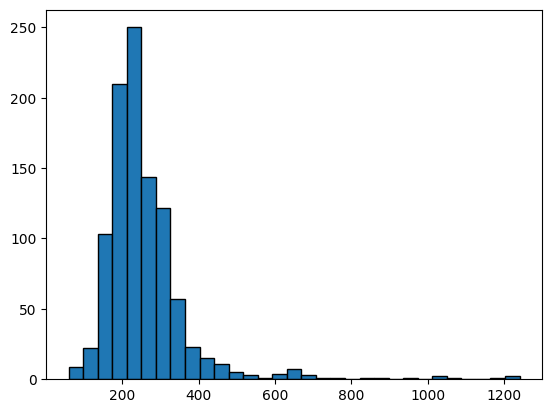

In [13]:
plt.hist(results, bins=int(sqrt(len(results))), edgecolor='black')